## Week 6: Dimensionality Reduction

**(1a) Load the data file 'data1.csv' and visualize the data.**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
df1 = pd.read_csv('data1.csv')
df1.head()

,X,Y
0,-3.086760,0.012814
1,2.368870,-0.056970
2,-0.741769,0.089533
3,-1.221298,0.145294
4,-2.080397,0.118519


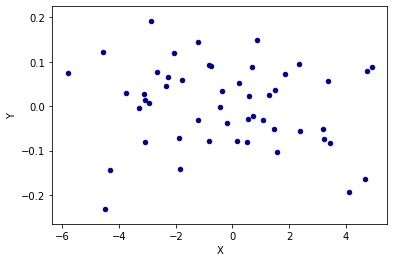

In [7]:
ax1 = df1.plot.scatter(x='X',y='Y',c='DarkBlue')

In [8]:
df1.dtypes

X    float64
Y    float64
dtype: object

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [10]:
df1.X[1]

2.3688704737166946

In [11]:
di = 0
dis  = 0
for i in range(0,50):
    dis = df1.X[i]*df1.X[i]
    di = di + dis
print(di)

358.1035064241586


In [12]:
di = 0
dis  = 0
for i in range(0,50):
    dis = df1.Y[i]*df1.Y[i]
    di = di + dis
print(di)

0.41912655244582403


**(1c) Visualize the approximated data and compare it with the original data.**

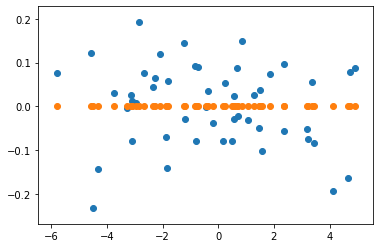

In [13]:
df1_new = df1.copy()
df1_new.Y = 0
import matplotlib.pyplot as plt
from matplotlib import style
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df1.X, df1.Y)
ax1.scatter(df1_new.X, df1_new.Y)


We can only use X-axis to represent the data

**(2a) Load the data file 'data2.csv'.**

In [14]:
df2 = pd.read_csv('data2.csv')
df2.head()

,A,B,C,D
0,0.007589,-8.886696,-12.316361,-0.036092
1,-1.461927,3.977425,-17.784232,0.075197
2,-0.891625,-7.426320,25.122113,-0.150440
3,1.057471,4.184783,39.927021,0.068328
4,0.147645,-0.309380,33.502600,-0.125913


**(2c) Plot the minimum representation loss as a function of the number of features used for representation.**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

In [16]:
loss_x1x2x3 = np.sum(df2['D'].pow(2))
loss_x1x3x4 = np.sum(df2['B'].pow(2))
loss_x1x2x4 = np.sum(df2['C'].pow(2))
loss_x2x3x4 = np.sum(df2['A'].pow(2))
print('Loss if we remove X4:',loss_x1x2x3,'\n','Loss if we remove X2:',loss_x1x3x4,'\n','Loss if we remove X3:',loss_x1x2x4,'\n','Loss if we remove X1:',loss_x2x3x4)

Loss if we remove X4: 5.105685170912927 
 Loss if we remove X2: 39148.26477490312 
 Loss if we remove X3: 1013388.6230866604 
 Loss if we remove X1: 990.7130563191936


Order of features in decreasing order of significance:<br>
1) X3 <br>
2) X2 <br>
3) X1 <br>
4) X4

In [17]:
loss_x3 = np.sum(df2['A'].pow(2)) + np.sum(df2['B'].pow(2)) + np.sum(df2['D'].pow(2))
loss1 = loss_x3
loss_x2x3 = np.sum(df2['A'].pow(2)) + np.sum(df2['D'].pow(2))
loss2 = loss_x2x3
loss3 = min(loss_x1x2x3,loss_x1x3x4,loss_x1x2x4,loss_x2x3x4)

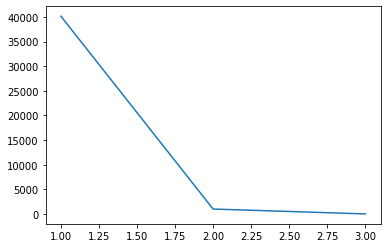

In [18]:
loss = [loss1,loss2,loss3]
features = [1,2,3]
plt.plot(features,loss)

In [36]:
A = df2.values

In [39]:
M = mean(A.T, axis=1)
print(M)

[-0.06711153  0.07250261  2.32547139  0.00421731]


**(2d) Compute the covariance matrix of the $m$ features. Comment with respect to (2c).**

In [19]:
df2.cov()

,A,B,C,D
A,0.987196,-0.057179,-0.140991,0.003057
B,-0.057179,39.182190,0.116676,-0.007770
C,-0.140991,0.116676,1008.989796,0.055835
D,0.003057,-0.007770,0.055835,0.005093


**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of the $m$ features.**

In [21]:
import pandas as pd
df3= pd.read_csv('data3.csv')
import matplotlib.pyplot as plt
from matplotlib import style

In [22]:
df3.head()

,X,Y
0,-2.173608,-2.191730
1,1.634760,1.715328
2,-0.461201,-0.587819
3,-0.760849,-0.966327
4,-1.387257,-1.554868


In [23]:
df3.cov()

,X,Y
X,3.594166,3.617564
Y,3.617564,3.658059


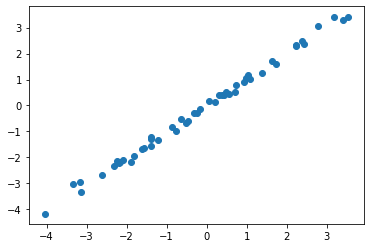

In [24]:
x = df3['X']
y = df3['Y']
plt.scatter(x,y)

**(3c) Uncorrelate the covariance matrix $C$ using an orthonormal transformation (rotation).**

In [26]:
matrix = df3.values

In [27]:
matrix.shape

(50, 2)

In [28]:
col1  = matrix[:,0]
col2 = matrix[:,1]
final_matrix = np.stack((col1,col2))
final_matrix

array([[-2.17360782,  1.63476034, -0.46120057, -0.76084939, -1.38725677,
        -3.16038751,  2.77823089, -1.82077887,  0.29727137, -0.52815505,
        -1.8856029 , -1.55794228,  3.53879227,  0.92527727,  0.48704063,
         2.37531524,  1.02935607, -0.87532172, -0.30841296,  2.23338962,
        -1.62027623,  3.19026959,  2.22403396, -1.38241985,  0.73552358,
        -1.22830635,  0.99108642, -4.05377364, -2.24412358, -2.62628197,
         3.40660263,  0.42656808, -0.24829261, -2.32472867,  0.37637328,
         0.54931046,  2.43412773, -2.08515389,  1.72939441, -0.63064001,
         0.21252601,  1.08648478, -1.40205107, -2.19097216, -3.15199545,
        -0.17066333,  1.3731776 ,  0.71799094, -3.35217469,  0.06547423],
       [-2.19172988,  1.71532841, -0.58781865, -0.96632665, -1.55486836,
        -2.95795359,  3.05261943, -1.93000363,  0.40973959, -0.65834177,
        -2.15712954, -1.64935418,  3.4155115 ,  0.8899853 ,  0.5178041 ,
         2.49247742,  1.17486299, -0.83275405, -0.

In [29]:
import numpy as np
C = np.cov(final_matrix)

In [30]:
eig_vals, eig_vecs = np.linalg.eig(C)
eig_vals

array([0.00840733, 7.24381702])

In [31]:
eig_vecs

array([[-0.710222  , -0.70397777],
       [ 0.70397777, -0.710222  ]])

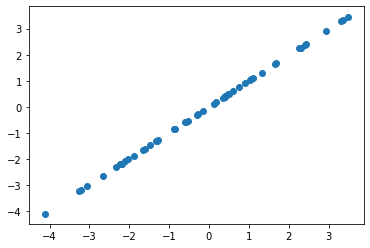

In [37]:
from numpy.linalg import inv
Y_proj = np.column_stack((Y[:,1],np.zeros((50,1))))
Y_deproj = np.dot(Y_proj,inv(eig_vecs.T))
plt.scatter(Y_deproj[:,0],Y_deproj[:,1])

**(3d) Apply the transformation to the data points. Now, visualize the data points.**

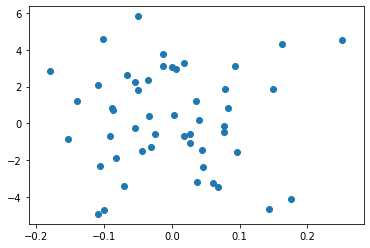

In [38]:
Y = np.matmul(matrix,eig_vecs)
plt.scatter(Y[:,0],Y[:,1])
# plt.ylim([-1,1])


**(3e) Find a one-dimensional representation of the data such that the representation loss is minimum.**

**(3f) Reverse the (rotation) transformation on the approximated data and visualize the data.**

In [40]:
print('Error if X is removed: ',np.sum(np.abs(Y[:,0])))
print('Error if Y is removed : ',np.sum(np.abs(Y[:,1])))

Error if X is removed:  3.7018123032959784
Error if Y is removed :  111.56757869544087


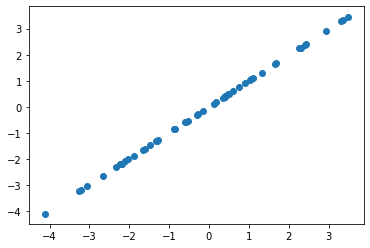

In [41]:
from numpy.linalg import inv
Y_proj = np.column_stack((Y[:,1],np.zeros((50,1))))
Y_deproj = np.dot(Y_proj,inv(eig_vecs.T))
plt.scatter(Y_deproj[:,0],Y_deproj[:,1])

**(3e) Compute the representational loss (with respect to the original data).**

**(3f) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [44]:
X = final_matrix.T

In [49]:
loss = np.sum(np.square(X-Y_deproj))
print('loss after tranformation:', loss)

loss after tranformation: 0.44020675531714204


In [51]:
loss_x1 = np.sum(df3['Y'].pow(2))
loss_x2 = np.sum(df3['X'].pow(2))
print('Loss with X1 representation: ',loss_x1)
print('Loss with X2 representation: ',loss_x2)

Loss with X1 representation:  180.85513738058907
Loss with X2 representation:  177.66749559601547


**(4a) Load the data file 'data4.csv'.**

**(4b) Plot the representation loss as a function of the number of features (in the transformed domain) used for representation.**

In [54]:
df4 = pd.read_csv('data4.csv')

In [55]:
df4.head()

,A,B,C,D
0,0.886636,5.414102,5.414102,-0.050537
1,1.571465,-4.373945,-4.373945,-0.046006
2,0.344091,-13.850319,-13.850319,-0.008261
3,-1.904044,-0.465430,-0.465430,-0.104967
4,0.321489,-1.487056,-1.487056,0.009423


In [56]:
C = df4.cov()

In [58]:
eig_vals, eig_vecs = np.linalg.eig(C)
eig_vals

array([ 8.24709393e+01,  9.63053418e-01,  5.08138259e-03, -4.13745755e-15])

In [59]:
df4.shape

(1000, 4)

In [62]:
from numpy import cov
from numpy.linalg import eig
A = df4.to_numpy()
# # calculate covariance matrix of centered matrix
V = cov(A.T)
# # eigendecomposition of covariance matrix
values, vectors = eig(V)
P = vectors.T.dot(A.T)
df4_new = P.T

In [65]:
cov(df4_new.T)

array([[ 8.24709393e+01, -1.53417486e-14,  1.67144688e-15,
        -2.91556585e-15],
       [-1.53417486e-14,  9.63053418e-01,  2.36269685e-16,
        -2.80213919e-17],
       [ 1.67144688e-15,  2.36269685e-16,  5.08138259e-03,
        -2.60003106e-18],
       [-2.91556585e-15, -2.80213919e-17, -2.60003106e-18,
         3.74670924e-16]])

**Covariances represent the importance of the feature. From the above matrix, we can order the features as A, B, C, D in descending order of importance**

In [68]:
df4_new = pd.DataFrame(df4_new)

In [72]:
loss_x1 = np.sum(df4_new[1].pow(2)) + np.sum(df4_new[2].pow(2)) + np.sum(df4_new[3].pow(2))
loss1 = loss_x1
loss_x1x2 = np.sum(df4_new[2].pow(2)) + np.sum(df4_new[3].pow(2))
loss2 = loss_x1x2
loss3 = np.sum(df4_new[3].pow(2))

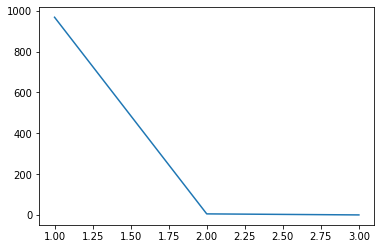

In [73]:
loss = [loss1,loss2,loss3]
features = [1,2,3]
plt.plot(features,loss)

# Application

**(5a) Load the human face data set given below.**

In [75]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)


** faces.data should contain vectorized 1-D images. faces.images should contain 2-D images.**

**(5b) Visualize the data set.**

['George W Bush' 'Gerhard Schroeder']
(639, 62, 47)


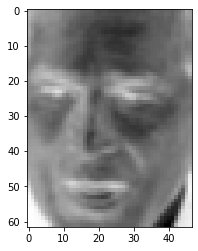

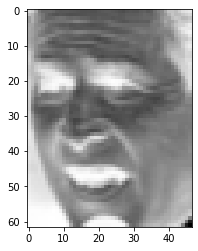

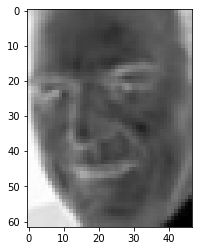

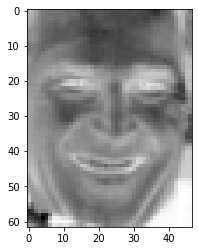

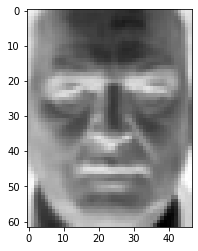

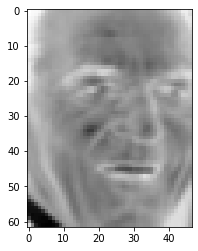

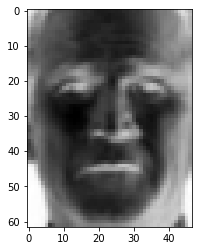

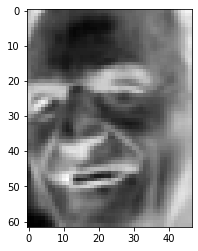

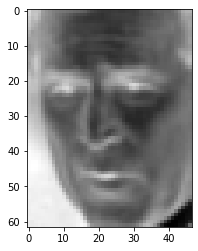

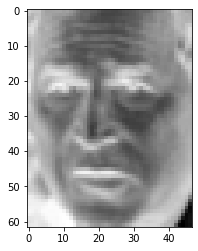

In [76]:
print(faces.target_names)
print(faces.images.shape)
for i in range(10):
    plt.imshow(faces.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

**(5c) Take faces.data and apply PCA. **

In [77]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)


PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**(5c) Take the top 150 features from PCA. Reconstruct the images with the top 150 features and visualize it. Comment.**

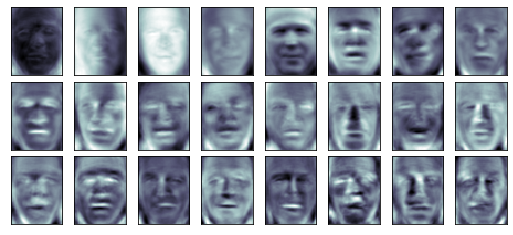

In [78]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

In [79]:
pca.components_.shape

(150, 2914)

**(5d) Consider any two classes (categories, e.g., humans) from the data set. Compare the performance of logistic regression with and without PCA. Comment on the classification accuracy. (Optional). **

In [91]:
y = faces.target
y.shape

(639,)

In [87]:
x = faces.data
x.shape

(639, 2914)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Without PCA**

In [115]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
from sklearn.linear_model import LogisticRegression
import time

In [116]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ("Train accuracy:", model.score(X_train,y_train))
print ("Test accuracy:",model.score(X_test,y_test))

start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 1.0
Test accuracy: 0.90625
--- 6.604194641113281e-05 seconds ---


**With PCA**

In [105]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [106]:
train_img = pca.transform(X_train)

In [107]:
test_img = pca.transform(X_test)

In [117]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, y_train)
print ("Train accuracy:", model.score(train_img,y_train))
print ("Test accuracy:",model.score(test_img,y_test))
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

Train accuracy: 0.9060665362035225
Test accuracy: 0.7890625
--- 0.00010013580322265625 seconds ---


/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
